In [66]:
%matplotlib inline
import numpy as np
from pylab import plt # from matplotlib import pyplot as plt

In [6]:
# File input/output: scipy.io
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary\
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

# scipy.misc.imread() vs matplotlib.pyplot.imread()

# Load text files: 
#     numpy.loadtxt(), numpy.savetxt()
# Clever loading of text/csv files:
#     numpy.genformat() / numpy.recfromcsv()
# Fast and efficient, but numpy-specific, binary format:
#     numpy.save() / numpy.load()


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
# Special fuctions scipy.special
# Bessel function: scipy.special.jn()
# Elliptic function: scipy.special.ellipj()
# Gamma function: scipy.special.gamma(), scipy.special.gammaln()
# Erf, area under a Gaussian curve: scipy.special.erf()

In [13]:
# Linear Algebra: scipy.linalg
from scipy import linalg

In [15]:
# Determinant of a square matrix
arr = np.array([[1, 2], [3, 4]])
arr = np.array([[3, 2], [6, 4]])
linalg.det(np.ones((3, 4)))

-2.0
0.0


ValueError: expected square matrix

In [40]:
# Inverse of a square matrix
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [41]:
# LinAlgError
arr = np.array([[3, 2], [6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix

In [37]:
# SVD - singular-value decomposition
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

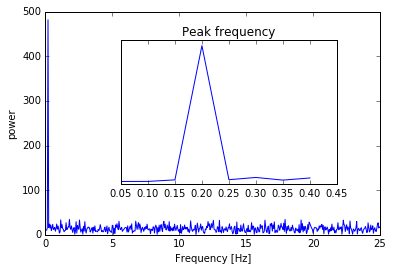

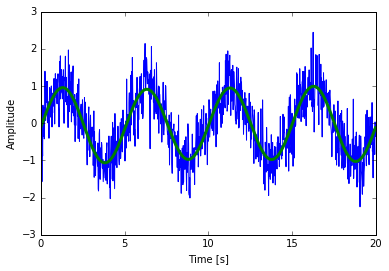

In [69]:
# Fast Fourier transforms scipy.fftpack
from scipy import fftpack

# noisy signal
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)   
    
# observer does not know signal frequency, only sampling time step
# signal is supposed to come from a real function so 
#     the Fourier transform will be symmetric.
# fftfreq() - generate the sampling frequences
# fft() - compute the fast Fourier transform
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

# resulting power is symmetric
# only the positive part spectrum needs to be used to find frequency
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fit)[pidxs]

plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[]) 

# signal frequency
freq = freqs[power.argmax()]
np.allclose(freq, 1. / period) # check that correct freq is found

# remove high-frequency noise from Fourier transformed signal
sig_fft[np.abs(sample_freq) > freq] = 0

# ifft() - compute filtered signal
main_sig = fftpack.ifft(sig_fft)

# plot
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


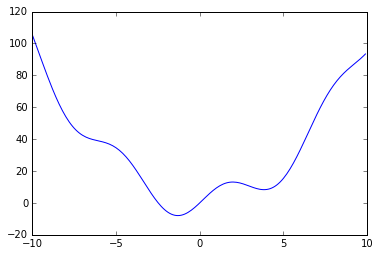

In [80]:
# Optimization and fit scipy.optimize
from scipy import optimize

def f(x):
    return x ** 2 + 10 * np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

# BFGS algorithm 
# - general and efficient way to find a minimum
# - gradient descent starting from a given intial point
optimize.fmin_bfgs(f, 0)

# possible issue: if the function has local minima, the algorithm may
# find these instead of the global minimum depending on the intial point
optimize.fmin_bfgs(f, 3, disp=0)

# if don't know neighborhood of global minimum to choose intial point,
# need to use costlier global optimiziation (which combines local
# optimizer with stochastic sampling of starting points)
# optimize.brute() also available (but less efficient)
optimize.basinhopping(f, 0)

# to find local minimum constrained to interval (0, 10)
xmin_local = optimize.fminbound(f, 0, 10)

# Finding the roots of a scalar function
root = optimize.fsolve(f, 1)
root2 = optimize.fsolve(f, -2.5)

# Curve fitting (sample from f() with noise)
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

# Given functional form of function from which samples were drawn,
# (x^2 + sin(x)), but not the amplitudes of the terms,
# can find amplitudes with least squares curve fitting
def f2(x, a, b):
    return a * x ** 2 + b * np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)

# see scipy_optimize.py

In [85]:
# Statistics and random numbers: scipy.stats

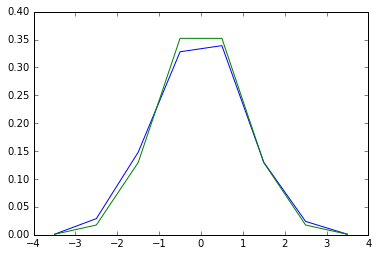

In [92]:
# Histogram and probability density function
from scipy import stats

a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
histogram = np.histogram(a, bins=bins, normed=True)[0]

bins = 0.5 * (bins[1:] + bins[:-1])
b = stats.norm.pdf(bins)

plt.plot(bins, histogram)
plt.plot(bins, b)

# MLE fit of the observations to estimate the parameters
# of the underlying distribution (given family of random process)
loc, std = stats.norm.fit(a)

In [96]:
# Percentiles
# percentile is an estimator of the CDF
from scipy import stats

a = np.random.normal(size=1000)
np.median(a)
stats.scoreatpercentile(a, 50)
stats.scoreatpercentile(a, 90)

1.2870304720707562

In [101]:
# Statistical tests
# statistical test is a decision indicator
"""
For example, if we have two sets of observations, that we assume are
generated from Gaussian processes, we can use T-test to decide whether
the two sets of observations are significantly different.
"""
from scipy import stats

a = np.random.normal(0, 1, size=100)
b = np.random.normal(0, 1, size=10)

t_statistic, p_value = stats.ttest_ind(a, b)

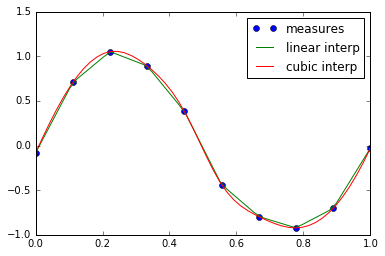

In [114]:
# Interpolation: scipy.interpolate
"""
interpolate is usefu for fitting a function from experimental data
and thus evaluating points where no measure exists.
"""
from scipy import interpolate

measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10) * 2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

# build a linear interpolation function
linear_interp = interpolate.interp1d(measured_time, measures)

# evaluate interpolate.linear_interp instance at the time of interest
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

# cubic interpolatin
cubic_interp = interpolate.interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

# plot
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(computed_time, linear_results, label='linear interp')
plt.plot(computed_time, cubic_results, label='cubic interp')
plt.legend()

In [ ]:
# Numerical Integration: scipy.integrate

In [112]:
# integrate.quad() - most generic integration routine
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi / 2)
np.allclose(res, 1)
np.allclose(err, 1 - res)

True

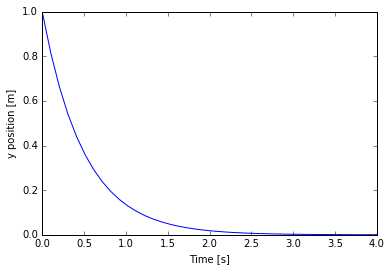

In [124]:
# Integrating ODE (Ordinary Differential Equations)
"""
dy/dt = rhs(y1, y2, .., t0,...)
"""
from scipy.integrate import odeint

# intro: solve ODE dy/dt = -2y between t = 0..4 
# with initial condition y(t=0) = 1
# counter_arr: extra arg to illustrate the function may be called
# several times for a single time step, until convergence
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

counter = np.zeros((1,), dtype=np.uint16)

# compute trajectory
time_steps = 40
time_vec = np.linspace(0, 4, time_steps)
yvec, info = odeint(calc_derivative, 1, time_vec, args=(counter,), \
                    full_output=True)

# derivative function called more then number of time steps
counter[0] > time_steps

# cumulative number of iterations for each of the 10 first time steps
info['nfe'][:10]

plt.plot(time_vec, yvec)
plt.xlabel('Time [s]')
plt.ylabel('y position [m]')


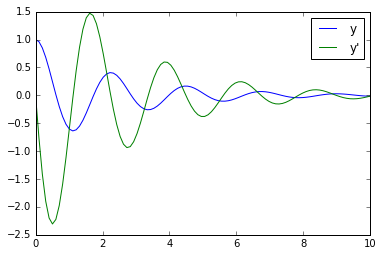

In [132]:
# Damped Spring-Mass Oscillator (2nd order oscillator)
"""
Position of a mass attached to a spring obeys the 2nd order ODE:
y'' + 2 eps wo y' + wo^2 y = 0 with wo^2 = k/m,
where k is the spring constant, m the mass, eps = c / (2 m wo),
and c the damping coefficient
"""
from scipy.integrate import odeint

mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))

# system will be underdamped, bc
eps < 1

"""
For odeint() solver the 2nd ord equation needs to be transformed into
a system of two first-order equations for the vector Y = (y, y').
It will be convenient to define nu = 2 eps * wo = c / m
and om = wo^2 = k/m
"""
nu_coef = cviscous / mass
om_coef = kspring / mass

# Calculate the velocity and acceleration
def calc_deri(yvec, time, nuc, omc):
    return yvec[1], -nuc * yvec[1] - omc * yvec[0]
    
time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend()

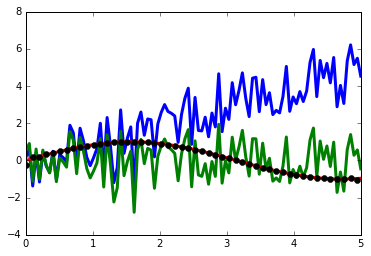

In [137]:
# Signal Processing: scipy.signal
from scipy import signal

# remove linear trend from signal
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

plt.plot(t, x, linewidth=3)
plt.plot(t, signal.detrend(x), linewidth=3)

# resample a signlal to n points using FFT
t = np.linspace(0, 5, 100)
x = np.sin(t)

plt.plot(t, x, linewidth=3)
plt.plot(t[::2], signal.resample(x, 50), 'ko')

(-0.5, 2047.5, 1535.5, -0.5)

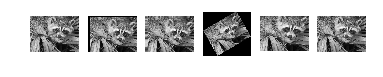

In [155]:
# Image Processing: scipy.ndimage
from scipy import ndimage
from scipy import misc

(-0.5, 2047.5, 1535.5, -0.5)

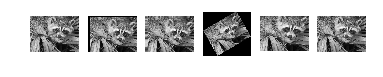

In [156]:
# Geometrical transformations on images

face = misc.face(gray=True)

shifted_face = ndimage.shift(face, (50, 50))

shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')

rotated_face = ndimage.rotate(face, 30)

cropped_face = face[50:-50, 50:-50]

zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

# plot
plt.subplot(1, 6, 1)  
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 6, 2)  
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 6, 3)  
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

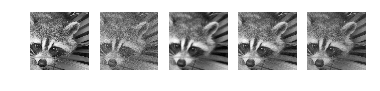

In [163]:
# Image filtering
from scipy import signal

face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right

noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)

median_face = ndimage.median_filter(noisy_face, size=5)

wiener_face = signal.wiener(noisy_face, (5, 5))

# plot
plt.subplot(1, 5, 1)  
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 5, 2)  
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 5, 3)  
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.axis('off')

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

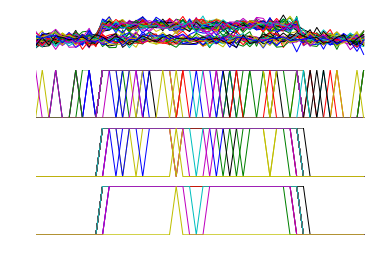

In [179]:
# Mathematical Morphology
"""
Elementary mathematical-morphology operations (erosion, dilation, 
opening, closing) use a 'structured element' in order to modify 
other geomtrical values. 
"""
# Generate structuring element
el = ndimage.generate_binary_structure(2, 1)

# Erosion
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
ndimage.binary_erosion(a).astype(a.dtype)
# erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

# Dilation
a = np.zeros((5, 5))
a[2, 2] = 1
ndimage.binary_dilation(a).astype(a.dtype)

# Opening
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
# Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)
# Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

# Closing
"""
An opening operation removes small strucutres, while a closing operation
fills small holes. Such operations can be used to "clean" an image
"""
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a >= 0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

# plot
plt.subplot(4, 1, 1)
plt.plot(a)
plt.axis('off')

plt.subplot(4, 1, 2)
plt.plot(mask)
plt.axis('off')

plt.subplot(4, 1, 3)
plt.plot(opened_mask)
plt.axis('off')

plt.subplot(4, 1, 4)
plt.plot(closed_mask)
plt.axis('off')

# gray-valued images
"""
For gray-valued images, eroding (resp. dilating) amounts to replacing a 
pixel by the minimal (resp. maximal) value among pixels covered by the
structuring element centered on the pixel of interest
"""
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 1:6] = 3
a[4, 4] = 2; a[2, 3] = 1
ndimage.grey_erosion(a, size=(3, 3))

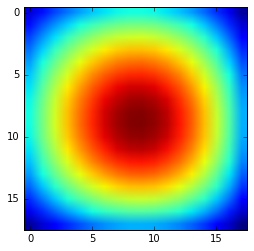

In [192]:
# Measurements on images

# generate synthetic binary image
x, y = np.indices((100, 100))
sig = np.sin(2 * np.pi * x / 50.) * np.sin(2 * np.pi * y / 50.) \
            * (1 + x * y / 50. ** 2) ** 2
mask = sig > 1

# look for various information about objects in the image
labels, nb = ndimage.label(mask)
areas = ndimage.sum(mask, labels, range(1, labels.max() + 1))
maxima = ndimage.maximum(sig, labels, range(1, labels.max() + 1))
sl = ndimage.find_objects(labels == 4)

plt.imshow(sig[sl[0]])